In [17]:
#%matplotlib inline
import pandas as pd
data=pd.read_csv('./data for figs/MEQs_3b.csv')
data2=pd.read_csv('./data for figs/MEQs_3c.csv')


# Histograms


Demonstrates how to plot histograms with matplotlib.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



In [5]:
data.describe()

,x(m),y(m),z(m),Mw,Time(s),fracture index
count,1178.000000,1.178000e+03,1178.000000,1178.000000,1178.0,1178.000000
mean,335580.470381,4.263117e+06,-2274.859818,-1.611279,4500.0,1450.815789
std,177.603031,2.247767e+02,212.260321,1.209229,0.0,938.130293
min,335093.648400,4.262577e+06,-2708.110133,-3.185777,4500.0,7.000000
25%,335480.194500,4.262929e+06,-2451.108409,-2.620719,4500.0,657.000000
50%,335592.924250,4.263160e+06,-2305.741621,-1.900529,4500.0,1375.000000
75%,335678.488300,4.263271e+06,-2090.320360,-0.796131,4500.0,2285.000000
max,336008.286800,4.263601e+06,-1850.906004,1.289696,4500.0,3110.000000


Generate data and plot a simple histogram
-----------------------------------------

To generate a 1D histogram we only need a single vector of numbers. For a 2D
histogram we'll need a second vector. We'll generate both below, and show
the histogram for each vector.



In [23]:
n_bins = 20

x = np.asarray(data['Mw'].tolist())
y = np.asarray(data2['Mw'].tolist())
plt.ylabel('Number of Events')
plt.xlabel('Predicted Magnitude')
plt.hist(x, bins = n_bins, label = '3-1b')
plt.hist(y, bins = n_bins, label = '3-1c')
plt.tight_layout()
plt.legend(loc='upper right')
#plt.suptitle('3-1b Injection', fontsize=16)

Text(0.5, 0.98, '3-1b Injection')

In [26]:
from matplotlib import pyplot

bins = 20

pyplot.hist(x, bins, alpha=0.5, label='3-1b')
pyplot.hist(y, bins, alpha=0.5, label='3-1c')
pyplot.legend(loc='upper right')
pyplot.show()

In [4]:
#N_points = 100000
n_bins = 20

error = np.asarray(data['Mw'].tolist())
#mag = np.asarray(data['MAGNITUDE'].tolist())

# Generate a normal distribution, center at x=0 and y=5
x = error
#y = mag

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#plt.subplots(1, 2, sharey=True, tight_layout=True)
#plt.show()

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
#axs[1].hist(y, bins=n_bins)

axs[0].set_ylabel('Number of Events')
axs[0].set_xlabel('Error Eigenvalue Max')
#axs[1].set_xlabel('Magnitude')

fig.savefig('Phase2_cycle4-9_MEQ.pdf')

/Users/podgrk/.conda/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/podgrk/.conda/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Updating histogram colors
-------------------------

The histogram method returns (among other things) a `patches` object. This
gives us access to the properties of the objects drawn. Using this, we can
edit the histogram to our liking. Let's change the color of each bar
based on its y value.



In [5]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

Plot a 2D histogram
-------------------

To plot a 2D histogram, one only needs two vectors of the same length,
corresponding to each axis of the histogram.



ValueError: autodetected range of [nan, nan] is not finite

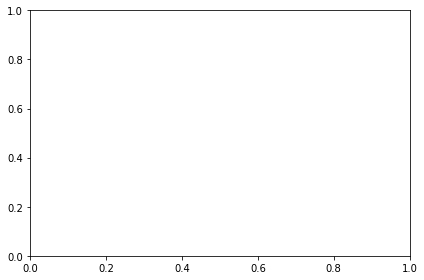

In [29]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

Customizing your histogram
--------------------------

Customizing a 2D histogram is similar to the 1D case, you can control
visual components such as the bin size or color normalization.



In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(x, y, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(x, y, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()

comets line
